<a href="https://colab.research.google.com/github/SALRIGO/pdm04/blob/main/py-pandas/pandas_3_harnessing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [2]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20210927', periods=6)
dates

DatetimeIndex(['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# dataframe
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-27,0.471435,-1.190976,1.432707,-0.312652
2021-09-28,-0.720589,0.887163,0.859588,-0.636524
2021-09-29,0.015696,-2.242685,1.150036,0.991946
2021-09-30,0.953324,-2.021255,-0.334077,0.002118
2021-10-01,0.405453,0.289092,1.321158,-1.546906
2021-10-02,-0.202646,-0.655969,0.193421,0.553439




---



### 데이터 재구성(setting) 또는 확장

In [5]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210927', periods=6))
s1

2021-09-27    1
2021-09-28    2
2021-09-29    3
2021-09-30    4
2021-10-01    5
2021-10-02    6
Freq: D, dtype: int64

In [6]:
df['F'] = s1

In [7]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

,A,B,C,D,F
2021-09-27,0.471435,-1.190976,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


#### Setting data by label & its index

> **at, iat**

- at : label을 이용하여 값 지정
- iat: index를 이용하여 값 지정

In [9]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Setting values by label:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2021-09-27,0.000000,-1.190976,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [11]:
# Setting values by position (index):
df.iat[0,1] = 0
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [12]:
# Important properties of DataFrame
len(df), df.shape, df.size  #len행의수, shape는 튜플로 출력 행열, size 데이터 타입의 모든 갯수

(6, (6, 5), 30)

In [ ]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

### Missing data 처리
> pandas primarily uses the value **np.nan** to represent missing data. 
- dropna()
- fillna()
- isna()

In [13]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [14]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [15]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1,NaN
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2,NaN
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3,NaN
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4,NaN


In [16]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2,1.0
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3,NaN
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4,NaN


In [17]:
df1.info()  # 마지막 값만 4가 아닌 2임 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-09-27 to 2021-09-30
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
 3   D       4 non-null      float64
 4   F       4 non-null      int64  
 5   E       2 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 384.0 bytes


### Check 0 or NaN in dataframe
- df.isnull().sum()
- df.isna().sum()

In [18]:
df1.isnull().sum()  # 마지막 값에만 null이 2개 있다

A    0
B    0
C    0
D    0
F    0
E    2
dtype: int64

In [19]:
df1.isna().sum()    # 같은 결과

A    0
B    0
C    0
D    0
F    0
E    2
dtype: int64

In [20]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [21]:
df.isnull().sum()   # 값이 다 같은 실수값을 가지고 있었기 때문에 non이 없음

A    0
B    0
C    0
D    0
F    0
dtype: int64

## Drop missing data from DataFrame

In [22]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2,1.0


In [23]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2,1.0
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3,5.0
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4,5.0


In [24]:
# Get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2021-09-27,False,False,False,False,False,False
2021-09-28,False,False,False,False,False,False
2021-09-29,False,False,False,False,False,True
2021-09-30,False,False,False,False,False,True




---



### 데이터 통계 (Statistics)

In [26]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [29]:
df.mean()

A    0.075206
B   -0.623942
C    0.770472
D   -0.158096
F    3.500000
dtype: float64

In [30]:
df.mean(0)

A    0.075206
B   -0.623942
C    0.770472
D   -0.158096
F    3.500000
dtype: float64

In [31]:
df.mean(1)

2021-09-27    0.424011
2021-09-28    0.477928
2021-09-29    0.582999
2021-09-30    0.520022
2021-10-01    1.093760
2021-10-02    1.177649
Freq: D, dtype: float64

In [33]:
df.std(0) , df.std(1)   # 열별 , 행별

(A    0.565658
 B    1.271236
 C    0.699548
 D    0.898456
 F    1.870829
 dtype: float64, 2021-09-27    0.750246
 2021-09-28    1.151986
 2021-09-29    1.912916
 2021-09-30    2.222262
 2021-10-01    2.418925
 2021-10-02    2.733166
 Freq: D, dtype: float64)

#### [DIY: 도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,E

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력 (Jupyter notebook or lab)
# %matplotlib inline

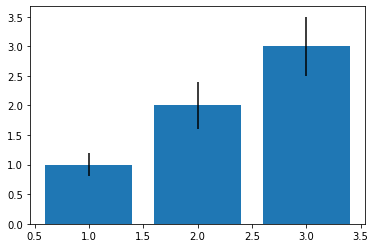

In [38]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(1,len(bar_labels)+1))    # 1에 첫번쨰 데이터가 위치하도록 조정
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

In [40]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


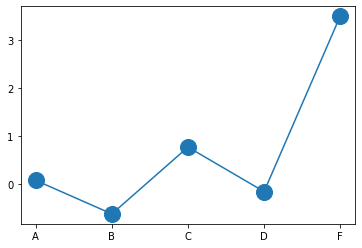

In [41]:
plt.plot(df.mean(0), '-o', ms=16)

<BarContainer object of 5 artists>

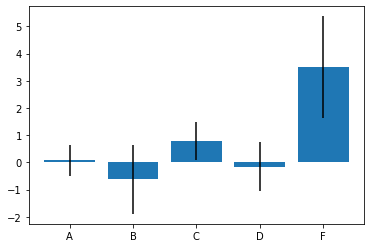

In [42]:
# df의 평균(mean(0))과 표준편차를 이용한 막대그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0)) #, color='rgbcy')

In [43]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


ValueError: ignored

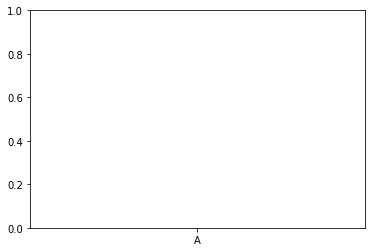

In [53]:
# [DIY] df의 날짜별 평균(mean(1))과 표준편차를 이용한 막대그래프
# Your code
# plt.plot(df.mean(1), '-o', ms=8)
plt.bar(bar_labels,df.mean(1), yerr=df.std(1)) #, color='rgbcy')

---